# Unsteady flow around a cylinder ($Re=200$)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1 = ib.stretching(256, 0.033, 0.20, int(0.5/0.033+16), 16, 16, 0.04)
s2 = ib.stretching(128, 0.033, 0.20, int(0.5/0.033+16), 16, 16, 0.04)
x = np.r_[-s2[::-1], s1[1:]]

s = ib.stretching(192, 0.033, 0.20, int(0.5/0.033+16), 16, 16, 0.04)
y = np.r_[-s[::-1], s[1:]]

solver = ib.Solver(x, y, iRe=1/200.0, Co=0.4)

## Immersed boundaries

In [4]:
solver.set_solids(ib.shapes.cylinder("cylinder", 0, 0, 0.5, solver.dxmin))

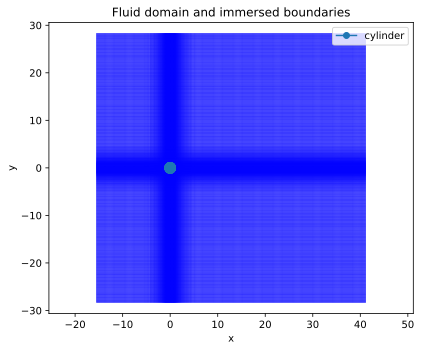

In [5]:
solver.plot_domain(figsize=(6, 5));

## Boundary conditions

In [6]:
uBC, vBC = solver.zero_boundary_conditions()
for k in range(4):
    uBC[k][:] = 1

sBC = ((np.zeros(solver.solids[0].l), np.zeros(solver.solids[0].l)), )

## Unsteady simulation

In [7]:
%time x, t, infodict = solver.steps(solver.zero(), uBC, vBC, sBC, outflowEast=True, \
                                    number=int(400/solver.dt), verbose=int(10/solver.dt))

       k            t          x_2       dxdt_2  cylinder_fx  cylinder_fy  Uinf@outlet 
     757  9.99240e+00  3.81625e+02  3.91158e+00  1.00309e+00 -3.80724e-14  1.00000e+00 
    1514  1.99848e+01  3.80176e+02  2.10023e+00  9.29323e-01 -1.59245e-13  1.00000e+00 
    2271  2.99772e+01  3.78944e+02  1.46717e+00  9.05145e-01 -1.43243e-13  1.00000e+00 
    3028  3.99696e+01  3.77905e+02  1.14096e+00  8.94035e-01  6.95005e-13  1.00000e+00 
    3785  4.99620e+01  3.77053e+02  9.18121e-01  8.87779e-01  5.90539e-12  1.00000e+00 
    4542  5.99544e+01  3.76395e+02  7.51841e-01  8.83745e-01  3.55791e-11  1.00000e+00 
    5299  6.99468e+01  3.75839e+02  6.20023e-01  8.80865e-01  1.98275e-10  1.00000e+00 
    6056  7.99392e+01  3.75347e+02  5.08864e-01  8.78650e-01  9.50705e-10  1.00000e+00 
    6813  8.99316e+01  3.74904e+02  4.12694e-01  8.76871e-01  3.66299e-09  1.00000e+00 
    7570  9.99240e+01  3.74505e+02  3.30062e-01  8.75410e-01  1.02216e-08  1.00000e+00 
    8327  1.09916e+02  3.74150e+

In [8]:
np.savetxt('14-CylinderRe200-t400.txt', x)

## Display results

Display velocity field and pressure at the last time step

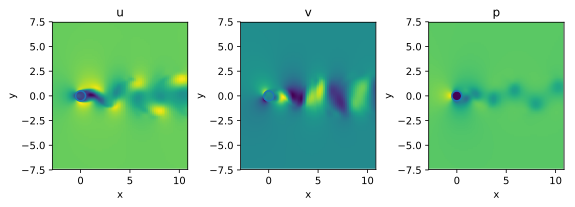

In [9]:
solver.plot_field(x, equal=True, xlim=(-2, 10), ylim=(-2, 2));

Temporal evolution of the force coefficients

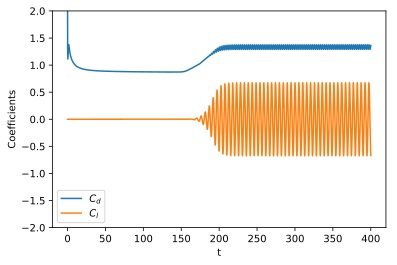

In [10]:
plt.plot(infodict['t'], infodict['cylinder_fx'], label=r'$C_d$')
plt.plot(infodict['t'], infodict['cylinder_fy'], label=r'$C_l$')
plt.ylim(-2, 2)
plt.xlabel('t')
plt.ylabel('Coefficients')
plt.legend();

Animation (requires ffmpeg!)

In [11]:
%time xanim, *_ = solver.steps(x, uBC, vBC, sBC, outflowEast=True, saveEvery=5, \
                               number=int(10/solver.dt), verbose=int(1/solver.dt))

       k            t          x_2       dxdt_2  cylinder_fx  cylinder_fy  Uinf@outlet 
      75  9.90000e-01  3.79226e+02  5.99655e+01  1.33557e+00 -3.17871e-01  1.00000e+00 
     150  1.98000e+00  3.78357e+02  6.09979e+01  1.30488e+00  4.44964e-01  1.00000e+00 
     225  2.97000e+00  3.79208e+02  6.09412e+01  1.37521e+00  6.25370e-01  1.00000e+00 
     300  3.96000e+00  3.78788e+02  6.10408e+01  1.29991e+00  3.24271e-03  1.00000e+00 
     375  4.95000e+00  3.78586e+02  6.18827e+01  1.34482e+00 -6.35540e-01  1.00000e+00 
     450  5.94000e+00  3.79339e+02  5.98496e+01  1.35279e+00 -4.36817e-01  1.00000e+00 
     525  6.93000e+00  3.78417e+02  6.10281e+01  1.29428e+00  3.19976e-01  1.00000e+00 
     600  7.92000e+00  3.79050e+02  6.16323e+01  1.37367e+00  6.64889e-01  1.00000e+00 
     675  8.91000e+00  3.79026e+02  6.06216e+01  1.31375e+00  1.48735e-01  1.00000e+00 
     750  9.90000e+00  3.78457e+02  6.14784e+01  1.32594e+00 -5.68821e-01  1.00000e+00 
     757  9.99240e+00  3.78524e+

In [12]:
from IPython.display import HTML
from matplotlib import animation
%config InlineBackend.figure_format = 'png'

Text(0,0.5,'y')

<Figure size 3600x2400 with 0 Axes>

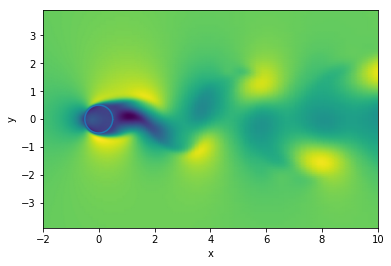

In [13]:
plt.figure(dpi=600)
fig, ax = plt.subplots()
quad = ax.pcolormesh(solver.fluid.u.x, solver.fluid.u.y,
                     solver.reshape(*solver.unpack(xanim[0]))[0],
                     rasterized=True, shading='gouraud')

for solid in solver.solids:
    plt.plot(solid.ξ, solid.η)
    
ax.axis('equal')
ax.set_xlim(-2, 10)
ax.set_ylim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [14]:
def init():
    quad.set_array([])
    return quad,

def animate(i):
    quad.set_array(solver.unpack(xanim[i])[0].ravel())
    return quad,

anim = animation.FuncAnimation(fig, animate, init_func=init,\
                               frames=len(xanim), interval=50, blit=True)

In [15]:
%time HTML(anim.to_html5_video())

CPU times: user 6min 52s, sys: 11.5 s, total: 7min 3s
Wall time: 44.9 s
